Fonte: https://dados.gov.br/dataset/dados-abertos-de-contratos-administrativos/resource/6a9526c4-bd86-46fb-b7aa-539df37f849a

### Bibliotecas

In [86]:
import pandas as pd
from IPython.display import Image
from google.oauth2 import service_account
import pandas_gbq

### Extração dos dados

In [34]:
contratos = pd.read_csv('tabela_contratos.csv')

In [35]:
contratos.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5


In [36]:
datas = pd.read_csv('tabela_datas.csv')

In [37]:
datas.head()

,id_data,data
0,1,20/05/2014
1,2,27/09/2014
2,3,28/11/2014
3,4,20/12/2014
4,5,28/12/2014


In [38]:
empresas = pd.read_csv('tabela_empresas.csv')

In [39]:
empresas.head()

,id_empresa,nome_empresa
0,1,Thomas Jefferson
1,2,Chaveiro City
2,3,HBL Carimbos
3,4,Claro S/A
4,5,Imprensa Nacional


### Trnasformação dos Dados

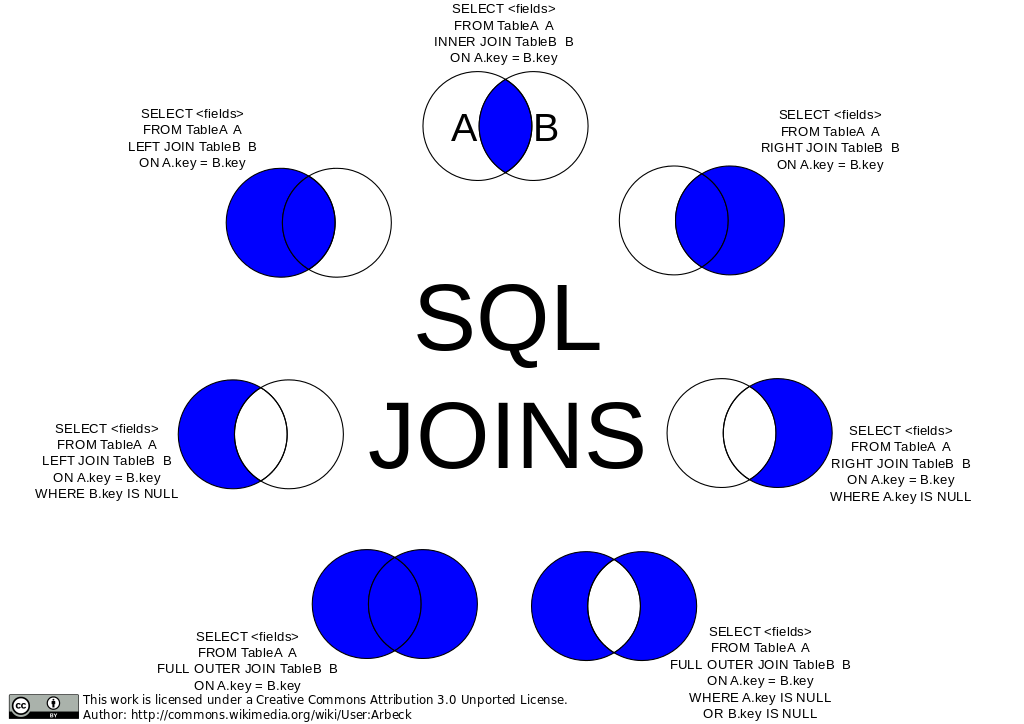

In [40]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/SQL_Joins.svg/1024px-SQL_Joins.svg.png')

In [41]:
contratos_mod = contratos.merge(empresas, 
                                left_on='fk_empresa_contratada', 
                                right_on='id_empresa', 
                                how='left')

In [42]:
contratos_mod = contratos.merge(empresas,
                                left_on= 'fk_empresa_contratada',
                                right_on='id_empresa',
                                how = 'left' )   

In [43]:
contratos_mod.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada,id_empresa,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1,1,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2,2,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3,3,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4,4,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5,5,Imprensa Nacional


In [44]:
contratos_mod.drop(columns=['id_empresa', 'fk_empresa_contratada'], inplace=True) # apqga colunas

In [45]:
contratos_mod.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional


In [46]:
contratos_final = contratos_mod.merge(datas, 
                                left_on='inicio_vigencia', 
                                right_on='id_data', 
                                how='left')

In [47]:
contratos_final.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa,id_data,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson,4,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City,13,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos,10,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A,6,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional,8,27/01/2015


In [48]:
contratos_final.drop(columns=['inicio_vigencia', 'id_data'], inplace=True)

In [49]:
contratos_final.rename(columns={'data': 'data_inicio_vigencia'}, inplace=True)

In [50]:
contratos_final.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,data_inicio_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015


In [61]:
contratos_final_agora_vai = contratos_final.merge(datas, 
                                                  left_on='termino_vigencia', 
                                                  right_on='id_data', 
                                                  how='left')

In [62]:
contratos_final_agora_vai.drop(columns=['termino_vigencia', 'id_data'], inplace=True)

In [63]:
contratos_final_agora_vai.rename(columns={'data': 'data_termino_vigencia'}, inplace=True)

In [64]:
contratos_final_agora_vai.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,20/12/2014,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,26/02/2015,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,10/02/2015,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,01/01/2015,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,27/01/2015,26/01/2016


In [55]:
contratos_final_agora_vai.count()

id_contrato              184
nome_contrato            184
objeto_contrato          184
valor_contrato           184
nome_empresa             184
data_inicio_vigencia     184
data_termino_vigencia    184
dtype: int64

In [56]:
contratos_final_agora_vai.dtypes

id_contrato                int64
nome_contrato             object
objeto_contrato           object
valor_contrato           float64
nome_empresa              object
data_inicio_vigencia      object
data_termino_vigencia     object
dtype: object

In [65]:
contratos_final_agora_vai.data_inicio_vigencia = pd.to_datetime(contratos_final_agora_vai.data_inicio_vigencia, 
                                                                format='%d/%m/%Y').dt.date

In [66]:
contratos_final_agora_vai.data_termino_vigencia = pd.to_datetime(contratos_final_agora_vai.data_termino_vigencia, # erro de conversão
                                                                format='%d/%m/%Y').dt.date

ValueError: day is out of range for month

In [67]:
for i in contratos_final_agora_vai.data_termino_vigencia:
    print(i)
    print(pd.to_datetime(i))

19/12/2015
2015-12-19 00:00:00
31/12/2015
2015-12-31 00:00:00
31/12/2015
2015-12-31 00:00:00
31/12/2015
2015-12-31 00:00:00
26/01/2016
2016-01-26 00:00:00
27/01/2016
2016-01-27 00:00:00
13/02/2016
2016-02-13 00:00:00
24/02/2016
2016-02-24 00:00:00
04/03/2016
2016-04-03 00:00:00
17/03/2016
2016-03-17 00:00:00
22/03/2016
2016-03-22 00:00:00
03/04/2016
2016-03-04 00:00:00
04/04/2016
2016-04-04 00:00:00
09/04/2016
2016-09-04 00:00:00
23/04/2016
2016-04-23 00:00:00
19/05/2016
2016-05-19 00:00:00
14/07/2016
2016-07-14 00:00:00
03/08/2016
2016-03-08 00:00:00
31/08/2016
2016-08-31 00:00:00
31/08/2016
2016-08-31 00:00:00
26/09/2016
2016-09-26 00:00:00
04/10/2016
2016-04-10 00:00:00
26/10/2016
2016-10-26 00:00:00
06/11/2016
2016-06-11 00:00:00
05/12/2016
2016-05-12 00:00:00
07/12/2016
2016-07-12 00:00:00
06/01/2017
2017-06-01 00:00:00
11/05/2017
2017-11-05 00:00:00
25/05/2017
2017-05-25 00:00:00
27/11/2017
2017-11-27 00:00:00
27/12/2017
2017-12-27 00:00:00
03/12/2016
2016-03-12 00:00:00
05/12/20

/tmp/ipykernel_76149/4267956409.py:3: UserWarning: Parsing '19/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
/tmp/ipykernel_76149/4267956409.py:3: UserWarning: Parsing '31/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
/tmp/ipykernel_76149/4267956409.py:3: UserWarning: Parsing '26/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
/tmp/ipykernel_76149/4267956409.py:3: UserWarning: Parsing '27/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
/tmp/ipykernel_76149/4267956409.py:3: UserWarning: Parsing '13/02/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
/tmp/ipyke

ValueError: day is out of range for month

Observa-se que a data de 31/09 não é disponível no calendário, vamos renomeala para 30/09

In [68]:
contratos_final_agora_vai.data_termino_vigencia = contratos_final_agora_vai.data_termino_vigencia.str.replace('31/09/2017', '30/09/2017')

In [69]:
contratos_final_agora_vai.data_termino_vigencia = pd.to_datetime(contratos_final_agora_vai.data_termino_vigencia, 
                                                                format='%d/%m/%Y').dt.date

In [70]:
contratos_final_agora_vai.dtypes

id_contrato                int64
nome_contrato             object
objeto_contrato           object
valor_contrato           float64
nome_empresa              object
data_inicio_vigencia      object
data_termino_vigencia     object
dtype: object

In [71]:
contratos_final_agora_vai.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26


In [72]:
contratos_final_agora_vai['tempo_contrato'] = (contratos_final_agora_vai.data_termino_vigencia - \
contratos_final_agora_vai.data_inicio_vigencia).dt.days

In [73]:
contratos_final_agora_vai

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19,364
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31,308
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31,324
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31,364
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26,364
...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365


In [74]:
contratos_final_agora_vai.nome_contrato.value_counts()

004/16           5
42064            5
006/2015         5
005/2015         5
005/2016         4
                ..
Disp. Lic. 24    1
Disp. Lic. 23    1
Disp. Lic. 22    1
Disp. Lic. 21    1
20/2020          1
Name: nome_contrato, Length: 122, dtype: int64

In [75]:
contratos_final_agora_vai[contratos_final_agora_vai.nome_contrato == '004/16']

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
49,50,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2016-05-01,2017-05-01,365
71,72,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2017-05-01,2018-05-01,365
99,100,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2019-05-01,0
123,124,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2020-05-01,366
167,168,004/16,Serviços de Telefonia Móvel (Celulares),62780.6,Claro S/A,2020-05-01,2021-05-01,365


In [76]:
contratos_final_agora_vai.tempo_contrato.value_counts()

 365     88
 366     45
 364     10
 1096     8
 730      2
 352      2
 731      2
 0        2
 749      2
 359      2
 750      2
 722      2
 1095     2
 729      2
 350      1
 531      1
 179      1
 182      1
-2        1
 340      1
 353      1
 363      1
 324      1
 339      1
 308      1
 394      1
 295      1
Name: tempo_contrato, dtype: int64

In [77]:
contratos_final_agora_vai = contratos_final_agora_vai[contratos_final_agora_vai.tempo_contrato > 0]

In [78]:
contratos_final_agora_vai.tail() # ultimas 5 linnhas

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365
183,184,20/2020,Contratação de Serviço comum de engenharia,102600.00,Serôa Construtora,2020-09-08,2021-09-08,365


In [79]:
contratos_final_agora_vai.reset_index(drop=True, inplace=True)

In [80]:
contratos_final_agora_vai.tail()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
176,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
177,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
178,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
179,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365
180,184,20/2020,Contratação de Serviço comum de engenharia,102600.00,Serôa Construtora,2020-09-08,2021-09-08,365


### Carregamento dos Dados

In [87]:
credentials = service_account.Credentials.from_service_account_file(filename='/home/alex/apps/drivers/ContaServicoBigQuery.json', 
                                                                    scopes=["https://www.googleapis.com/auth/cloud-platform"])

In [88]:
contratos_final_agora_vai.to_gbq(credentials=credentials, 
                                 destination_table='curso_etl.etl_csv', 
                                 if_exists='replace', 
                                 table_schema=[{'name': 'data_inicio_vigencia', 'type': 'DATE'},
                                               {'name': 'data_termino_vigencia', 'type': 'DATE'}])